In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/titanic_backup

In [ ]:
!cp train.csv /content/drive/MyDrive/titanic_backup/
!cp test.csv /content/drive/MyDrive/titanic_backup/
!cp model.pkl /content/drive/MyDrive/titanic_backup/
!cp submission.csv /content/drive/MyDrive/titanic_backup/

# ***Data Preprocessing***

**Loading Datasets**

Importing libraries,loading data and previewing training dataset

In [ ]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Previewing the test dataset

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Inspecting the Datasets**

Inspecting the training dataset

In [ ]:
print(train_df.info())
print(train_df.describe())
print(train_df.shape)
print(train_df.columns)
print(train_df.isnull().sum())
print(train_df.duplicated().sum())
print(train_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

Inspecting the testing dataset

In [ ]:
print(test_df.info())
print(test_df.describe())
print(test_df.shape)
print(test_df.columns)
print(test_df.isnull().sum())
print(test_df.duplicated().sum())
print(test_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

**Handling Missing Values**

Calculating missing value percentages in 'Age' columns of training data

In [ ]:
(train_df['Age'].isnull().sum())/len(train_df)*100


np.float64(19.865319865319865)

Calculating missing value percentages in 'Cabin' columns of training data

In [ ]:
(train_df['Cabin'].isnull().sum())/len(train_df)*100


np.float64(77.10437710437711)

Calculating missing value percentages in 'Embarked' columns of training data

In [ ]:
(train_df['Embarked'].isnull().sum())/len(train_df)*100

np.float64(0.22446689113355783)

Filling missing values in 'Age' using median

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

<ipython-input-8-44ec9270a49e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(),inplace=True)


Dropping the 'Cabin' column

In [ ]:
train_df.drop('Cabin',axis=1,inplace= True)

Filling missing values in 'Embarked' using mode

In [ ]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace= True)

<ipython-input-10-691efc074dc4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace= True)


Calculating missing value percentages in 'Age' columns of testing data

In [ ]:
(test_df['Age'].isnull().sum()/len(test_df))*100

np.float64(20.574162679425836)

Calculating missing value percentages in 'Cabin' columns of testing data

In [ ]:
(test_df['Cabin'].isnull().sum()/len(test_df))*100

np.float64(78.22966507177034)

Calculating missing value percentages in 'Fare' columns of testing data

In [ ]:
(test_df['Fare'].isnull().sum()/len(test_df))*100

np.float64(0.23923444976076555)

Filling missing values in 'Age' using median

In [ ]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

<ipython-input-14-39c460faf7d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(),inplace=True)


Dropping the 'Cabin' column

In [ ]:
test_df.drop('Cabin',axis=1,inplace= True)

Filling missing values in 'Fare' using median

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

<ipython-input-16-c1bbb2c8c6c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)


Finding dupliacte values in training data

**Removing Duplicate Rows**

In [ ]:
train_df.duplicated().sum()

np.int64(0)

Finding duplicate values in testing data

In [ ]:
test_df.duplicated().sum()

np.int64(0)

**Converting the Datatypes**

Converting 'Pclass' column to categorical data type of training dataset

In [ ]:
train_df['Pclass']=train_df['Pclass'].astype('category')

Converting  columns to categorical and string  data types of trainig dataset

In [ ]:
train_df=train_df.astype({'Sex':'category','Embarked':'category', 'Name':'string','Ticket':'string'})

Converting 'Pclass' column to categorical data type of testing dataset

In [ ]:
test_df['Pclass']=test_df['Pclass'].astype('category')


Converting  columns to categorical and string  data types of testing dataset

In [ ]:
test_df=test_df.astype({'Sex':'category','Embarked':'category', 'Name':'string','Ticket':'string'})

Verifying updated data types in the training dataset

In [ ]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,category
Name,string[python]
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,string[python]
Fare,float64


Verifying updated data types in the testing dataset

In [ ]:
test_df.dtypes

,0
PassengerId,int64
Pclass,int64
Name,string[python]
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,string[python]
Fare,float64
Embarked,category


**Encoding Categorical Variables**

Label Encoding 'Sex' and 'Embarked' columns

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train_df['Sex']=le.fit_transform(train_df['Sex'])
train_df['Embarked']=le.fit_transform(train_df['Embarked'])
test_df['Sex']=le.fit_transform(test_df['Sex'])
test_df['Embarked']=le.fit_transform(test_df['Embarked'])



Verifying updated data types in the testing dataset

In [ ]:
test_df.dtypes

,0
PassengerId,int64
Pclass,int64
Name,string[python]
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,string[python]
Fare,float64
Embarked,int64


Verifying updated data types in the training dataset

In [ ]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,category
Name,string[python]
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,string[python]
Fare,float64


**Feature Scaling(Normalize or Standardize data)**

Applying RobustScaler on 'Age' and 'Fare' columns

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create a scaler object
scaler = RobustScaler()

# Fit on train, transform both train and test
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])


Min and Max values of 'Age'and 'Fare' after scaling

In [ ]:
print(train_df['Age'].min(),train_df['Age'].max())
print(train_df['Fare'].min(),train_df['Fare'].max())
print(test_df['Age'].min(),test_df['Age'].max())
print(test_df['Fare'].min(),test_df['Fare'].max())

-2.1215384615384614 4.0
-0.6260047813734322 21.56273820248077
-2.1407692307692305 3.6923076923076925
-0.6260047813734322 21.56273820248077


**Detecting Outliers,Handling Outliers and Dropping Irrelevant Columns**

Visualizing outliers in 'Age' using Seaborn Boxplots(training dataset)

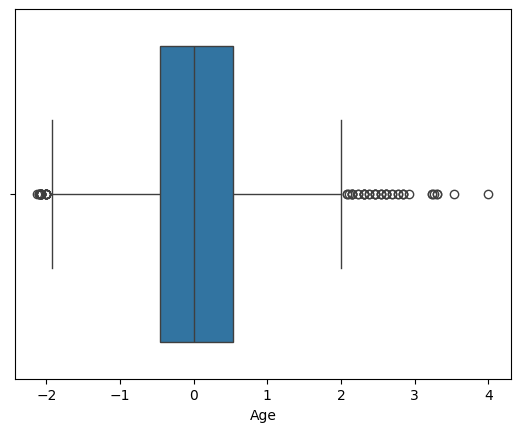

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=train_df['Age'])
plt.show()

Visualizing outliers in 'Fare' using Seaborn Boxplots (train)

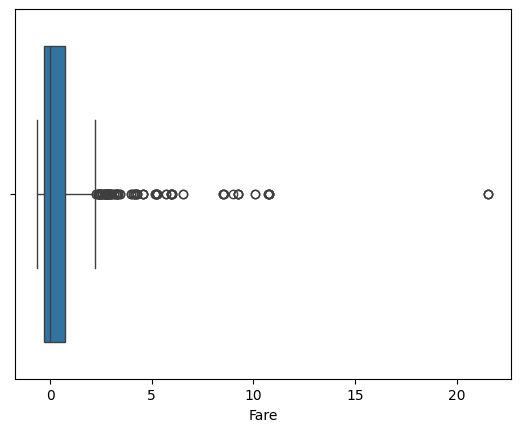

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=train_df['Fare'])
plt.show()

Calculating IQR for 'Age' and 'Fare' to detect outliners (training)

In [ ]:
Q1_age = train_df['Age'].quantile(0.25)
Q3_age = train_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

outliers_age = train_df[(train_df['Age'] < lower_age) | (train_df['Age'] > upper_age)]
print("Age outliers:\n", outliers_age)

# Repeat similarly for Fare
Q1_fare = train_df['Fare'].quantile(0.25)
Q3_fare = train_df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare

outliers_fare = train_df[(train_df['Fare'] < lower_fare) | (train_df['Fare'] > upper_fare)]
print("Fare outliers:\n", outliers_fare)

Age outliers:
      PassengerId  Survived Pclass  \
7              8         0      3   
11            12         1      1   
15            16         1      2   
16            17         0      3   
33            34         0      2   
..           ...       ...    ...   
827          828         1      2   
829          830         1      1   
831          832         1      2   
851          852         0      3   
879          880         1      1   

                                              Name  Sex       Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    1 -2.000000      3   
11                        Bonnell, Miss. Elizabeth    0  2.307692      0   
15                Hewlett, Mrs. (Mary D Kingcome)     0  2.076923      0   
16                            Rice, Master. Eugene    1 -2.000000      4   
33                           Wheadon, Mr. Edward H    1  2.923077      0   
..                                             ...  ...       ...    ...   
827     

Applying RobustScaler(training)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(train_df[['Age', 'Fare']])

Dropped irrevelant columns(training)

In [ ]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


Visualizing outliers in 'Age' using Seaborn Boxplots(testing dataset)

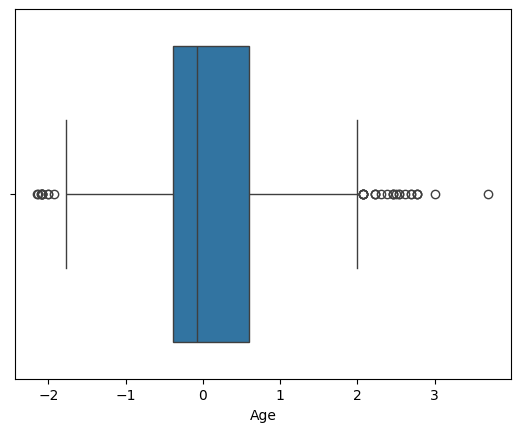

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=test_df['Age'])
plt.show()

Visualizing outliers in 'Fare' using Seaborn Boxplots(testing dataset)

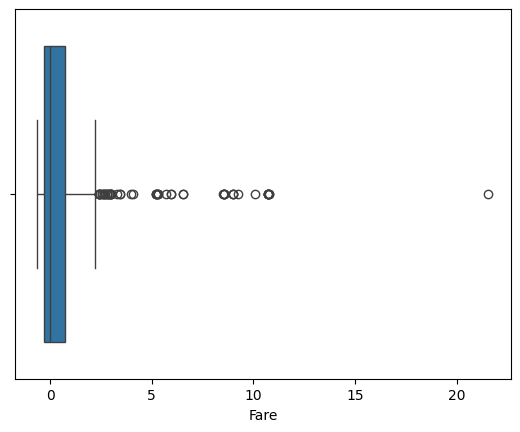

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=test_df['Fare'])
plt.show()

Calculating IQR for 'Age' and 'Fare' to detect outliers (testing dataset)

In [ ]:
Q1_age = test_df['Age'].quantile(0.25)
Q3_age = test_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

outliers_age = test_df[(test_df['Age'] < lower_age) | (test_df['Age'] > upper_age)]
print("Age outliers:\n", outliers_age)

# Repeat similarly for Fare
Q1_fare = test_df['Fare'].quantile(0.25)
Q3_fare = test_df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare

outliers_fare = test_df[(test_df['Fare'] < lower_fare) | (test_df['Fare'] > upper_fare)]
print("Fare outliers:\n", outliers_fare)

Age outliers:
      PassengerId  Pclass                                               Name  \
2            894       2                          Myles, Mr. Thomas Francis   
13           905       2                               Howard, Mr. Benjamin   
20           912       1                             Rothschild, Mr. Martin   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
77           969       1  Cornell, Mrs. Robert Clifford (Malvina Helen L...   
81           973       1                                 Straus, Mr. Isidor   
89           981       2                        Wells, Master. Ralph Lester   
96           988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
114         1006       1             Straus, Mrs. Isidor (Rosalie Ida Blun)   
117         1009       3                    Sandstrom, Miss. Beatrice Irene   
142         1034       1             

Applying RobustScaler(testing)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
test_df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(test_df[['Age', 'Fare']])

Dropped irrevelant columns(testing)

In [ ]:
# test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train_df.to_csv("cleaned_titanic.csv",index=False)

**Train-Test Split**

Splitting the dataset into features(X) and target variable (y) for training

In [ ]:
from sklearn.model_selection import train_test_split
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']

 Splitting the dataset into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size =0.2,random_state=42)

Importing Logistic Regression and Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Predicting the target variable using the training model

In [ ]:
y_pred=model.predict(X_val)

NameError: name 'model' is not defined

Evaluating Model Perfromance Using Accuracy Score and Classifiation Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:",accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Saving the trained model using joblib

In [ ]:
import joblib
joblib.dump(model,'titanic_model.pkl')

['titanic_model.pkl']

In [ ]:
test_processed=test_df.copy()

Handling missing values:Filling Numeric and categorical columns

In [ ]:
# Fill numeric with mean
for col in test_processed.select_dtypes(include=['float64', 'int64']).columns:
    test_processed[col] = test_processed[col].fillna(test_processed[col].mean())

# Fill categorical with mode
for col in test_processed.select_dtypes(include=['object', 'category']).columns:
    test_processed[col] = test_processed[col].fillna(test_processed[col].mode()[0])

Checking missing values in test data

In [ ]:
print(test_processed.isnull().sum().sum())

0


Overview of test data structure

In [ ]:
test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    category
 1   Sex          418 non-null    int64   
 2   Age          418 non-null    float64 
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    int64   
 7   Age_scaled   418 non-null    float64 
 8   Fare_scaled  418 non-null    float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 26.8 KB


Extracting feature columns for prediction

In [ ]:
print(X_train.columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']


Extracting and printing training data columns

In [ ]:
training_columns = train_df.columns.tolist()
print(training_columns)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']


Removing 'Survived' column from training dataset

In [ ]:
training_columns.remove('Survived')

Applying test data columns with training data columns

In [ ]:
test_processed = test_processed[X_train.columns]

Displaying feature columns after dropping target column

In [ ]:
print(train_df.drop('Survived',axis=1).columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']


Displaying columns in test dataset

In [ ]:
print(test_processed.columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']


Checking coulmn names in test data and comparing with training data coulmns

In [ ]:
print("Columns in test_processed:", test_processed.columns.tolist())
print("Columns scaler expects:", training_columns)

Columns in test_processed: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']
Columns scaler expects: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_scaled', 'Fare_scaled']


Aliginig test data coulmns with training data columns

In [ ]:
test_processed=test_processed[training_columns]

Extracting and scaling numeric columns in test data

In [ ]:

# Step 1: Select numeric columns you scaled in training
cols_to_scale = ['Age', 'Fare']  # Replace with your actual numeric columns used for scaling

# Step 2: Extract those columns from test_processed
test_numeric = test_processed[cols_to_scale]

# Step 3: Scale only these numeric columns
test_scaled_numeric = scaler.transform(test_numeric)

# Step 4: Put scaled values back into test_processed dataframe
test_processed.loc[:, cols_to_scale] = test_scaled_numeric

# Now, use test_processed directly for prediction
predictions = model.predict(test_processed)


Displaying predictions made by the model

In [ ]:
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


Displaying test data columns

In [ ]:
print(test_df.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_scaled', 'Fare_scaled'],
      dtype='object')


Creating the Submission file for final prediction output

In [ ]:
output = pd.DataFrame({
    'PassengerId': range(892, 892 + len(predictions)),  # Start from 892 if using Titanic dataset
    'Survived': predictions
})
output.to_csv('submission.csv', index=False)